OpenBLAS WARNING - could not determine the L2 cache size on this system, assuming 256k
OpenBLAS WARNING - could not determine the L2 cache size on this system, assuming 256k
OpenBLAS WARNING - could not determine the L2 cache size on this system, assuming 256k


Text(0, 0.5, 'Relative flux')

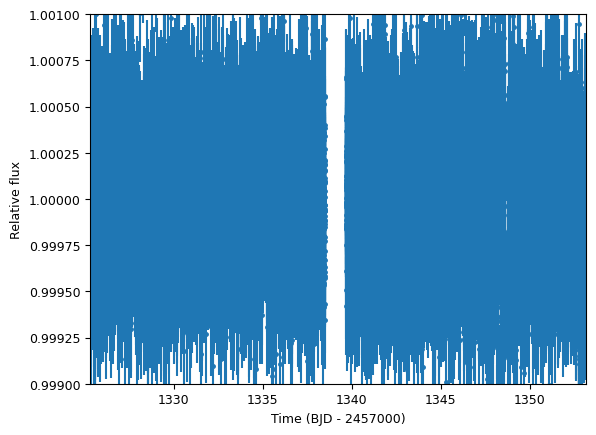

In [1]:
import juliet
import numpy as np
# First, get times, normalized-fluxes and errors for TOI-141 from MAST:
t,f,ferr  = juliet.get_TESS_data('https://archive.stsci.edu/hlsps/tess-data-alerts/'+\
                                 'hlsp_tess-data-alerts_tess_phot_00403224672-'+\
                                 's01_tess_v1_lc.fits')

# Plot the data!
import matplotlib.pyplot as plt
plt.errorbar(t,f,yerr=ferr,fmt='.')

plt.xlim([np.min(t),np.max(t)])
plt.ylim([0.999,1.001])
plt.xlabel('Time (BJD - 2457000)')
plt.ylabel('Relative flux')

In [2]:
# Create dictionaries:
times, fluxes, fluxes_error = {},{},{}
# Save data into those dictionaries:
times['TESS'], fluxes['TESS'], fluxes_error['TESS'] = t,f,ferr
# If you had data from other instruments you would simply do, e.g.,
# times['K2'], fluxes['K2'], fluxes_error['K2'] = t_k2,f_k2,ferr_k2

In [3]:
priors = {}

# Name of the parameters to be fit:
params = ['P_p1','t0_p1','r1_p1','r2_p1','q1_TESS','q2_TESS','ecc_p1','omega_p1',\
              'rho', 'mdilution_TESS', 'mflux_TESS', 'sigma_w_TESS']

# Distribution for each of the parameters:
dists = ['normal','normal','uniform','uniform','uniform','uniform','fixed','fixed',\
                 'loguniform', 'fixed', 'normal', 'loguniform']

# Hyperparameters of the distributions (mean and standard-deviation for normal
# distributions, lower and upper limits for uniform and loguniform distributions, and
# fixed values for fixed "distributions", which assume the parameter is fixed)
hyperps = [[1.,0.1], [1325.55,0.1], [0.,1], [0.,1.], [0., 1.], [0., 1.], 0.0, 90.,\
                   [100., 10000.], 1.0, [0.,0.1], [0.1, 1000.]]

# Populate the priors dictionary:
for param, dist, hyperp in zip(params, dists, hyperps):
    priors[param] = {}
    priors[param]['distribution'], priors[param]['hyperparameters'] = dist, hyperp


In [ ]:
# Load dataset into juliet, save results to a temporary folder called toi141_fit:
dataset = juliet.load(priors=priors, t_lc = times, y_lc = fluxes, \
                      yerr_lc = fluxes_error, out_folder = 'toi141_fit')

# Fit and absorb results into a juliet.fit object:
results = dataset.fit(n_live_points = 300)

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  300
 dimensionality =    9
 *****************************************************

 MultiNest Warning!
 Parameter            4  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            4  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            4  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            4  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            4  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            4  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            4  of mode            1  is converging toward

In [ ]:
results